Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
!pip install tensorflow==2.8.0
!pip install -q keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 82.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 382.4 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 82.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 51.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
import numpy as np
import os


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [45]:
### This command is to clear the output folder before sampling the images at a later point in this notebook. This is done to avoid accumulating the samples
import shutil
import os
path_to_output_dataset ="/kaggle/working/data/"
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
for i in class_names:
    if os.path.exists(path_to_output_dataset + i):
      shutil.rmtree(path_to_output_dataset + i)

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
dataset_path = "/kaggle/input/cancerdataset/Skin cancer ISIC The International Skin Imaging Collaboration"
data_dir_train = pathlib.Path(dataset_path + "/Train")
data_dir_test = pathlib.Path(dataset_path + "/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               batch_size=batch_size,
                                                               image_size=(img_height,img_width),
                                                               label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,
                                                            image_size=(img_height,img_width), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [10]:
import matplotlib.pyplot as plt

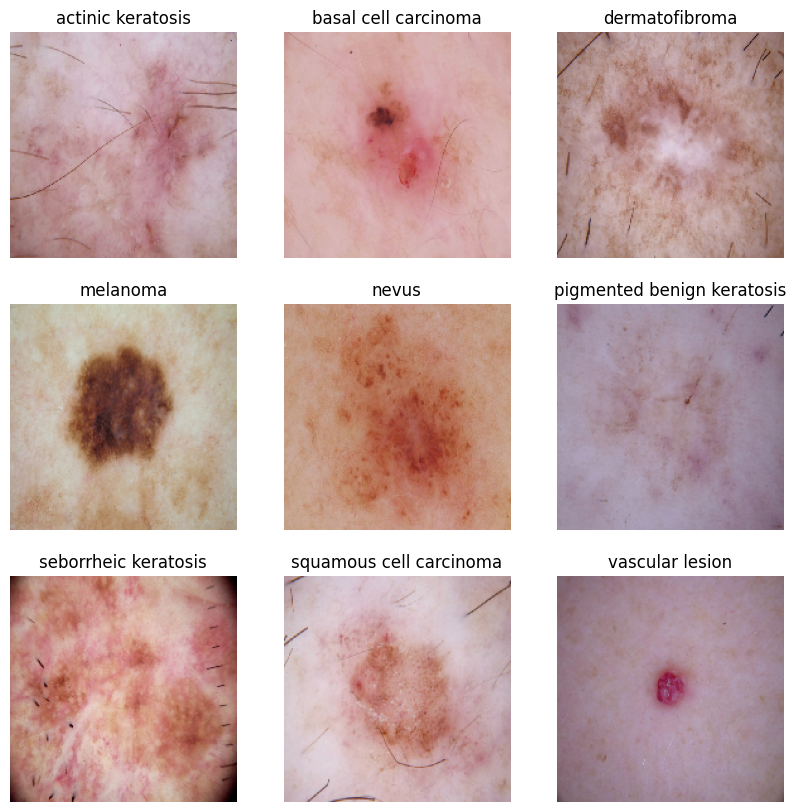

In [11]:
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(10,10))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
def CNNModel_6layers():
    model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1.0 / 255.0,input_shape=(img_height, img_width, 3)))
    
    model.add(layers.Conv2D(32, 2, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, 2, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, 2, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(256, 2, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(512, 2, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))    
    model.add(Dense(num_classes, activation='softmax'))  

    return model


In [14]:
base_model = CNNModel_6layers()
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       3

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [15]:
### Todo, choose an appropirate optimiser and loss function

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'
base_model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       3

### Train the model

In [17]:
epochs = 20
history = base_model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 32s 134ms/step - loss: 1.9433 - accuracy: 0.2801 - val_loss: 1.7354 - val_accuracy: 0.3624
Epoch 2/20
56/56 [==============================] - 3s 45ms/step - loss: 1.5768 - accuracy: 0.4241 - val_loss: 1.5614 - val_accuracy: 0.4586
Epoch 3/20
56/56 [==============================] - 3s 46ms/step - loss: 1.4476 - accuracy: 0.4883 - val_loss: 1.4893 - val_accuracy: 0.4765
Epoch 4/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3715 - accuracy: 0.5195 - val_loss: 1.4121 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 3s 46ms/step - loss: 1.3496 - accuracy: 0.5212 - val_loss: 1.4143 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3018 - accuracy: 0.5234 - val_loss: 1.4086 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 3s 46ms/step - loss: 1.1982 - accuracy: 0.5625 - val_loss: 1.3503 - val_accuracy: 0.5190
Epoch 8/20


### Visualizing training results

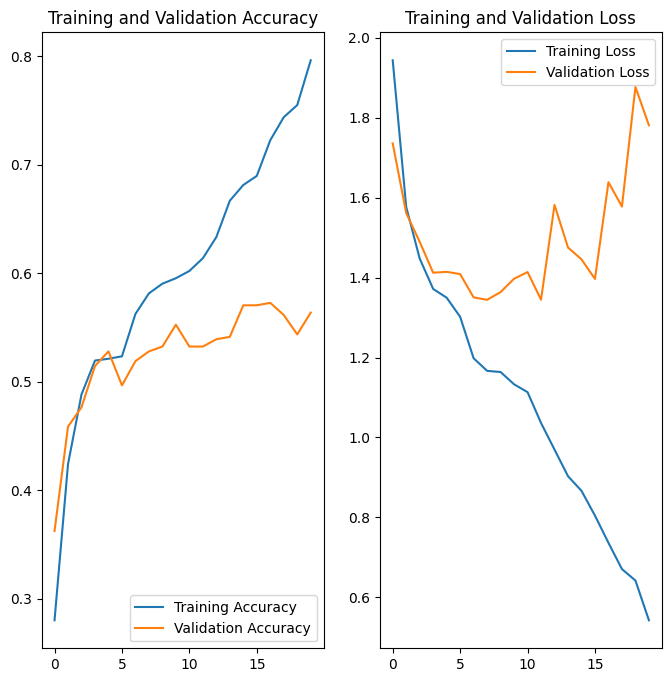

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Inference -

The accuracy of the CNN model is about ~80%. But the validation accuracy indicates that the model is overfitting as the accuracy of the validation dataset is only ~56% after 20 epochs.

It is possible that the dataset is limited and does not have a lot of variety of the images for classifiction purposes. To handle this scenario, data augmentation will be done as the next step.

Data Augmentation helps generate multiple versions of an image by differentiating aspects like zoom, flipping, adjusting contrast, rotation etc. This technique will be used in the next step to generate more images with subtle differences for the model to be able to train better.

This step is likely to help is better validation accuracy and prevent overfitting.



In [19]:
# Apply augmentation strategy to the image

def random_contrast(image, min_val=0.5, max_val=1.5):
    return tf.image.random_contrast(image, lower=min_val, upper=max_val)

def random_brightness(image, max_delta=0.3):
    return tf.image.random_brightness(image, max_delta=max_delta)

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.Lambda(random_contrast),
    layers.Lambda(random_brightness)
])


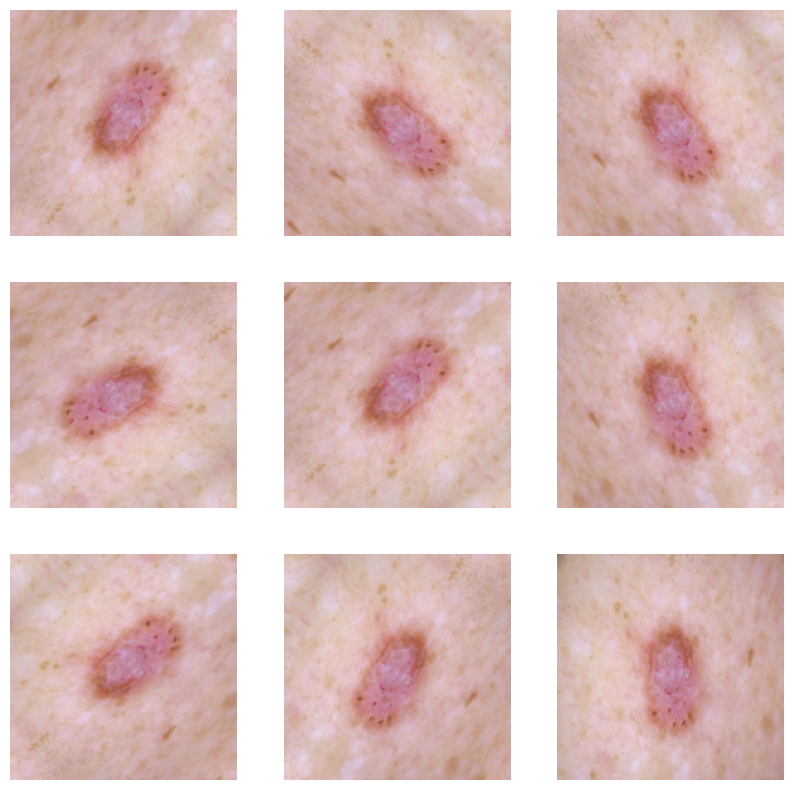

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))

for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    #print(image.img_to_array(augmented_images[0]))
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
def CNNModel_6layers_augmentation():
    model = Sequential()
    model.add(data_augmentation)
    model.add(layers.experimental.preprocessing.Rescaling(1.0 / 255.0,input_shape=(img_height, img_width, 3)))
    
    model.add(layers.Conv2D(32, 2, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, 2, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, 2, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(256, 2, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(512, 2, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))    
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))    
    return model


In [22]:
model_aug = CNNModel_6layers_augmentation()

### Compiling the model

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'
model_aug.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

### Training the model

In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

epochs = 20
history = model_aug.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 4s 56ms/step - loss: 2.0540 - accuracy: 0.2037 - val_loss: 2.0089 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 3s 51ms/step - loss: 1.8604 - accuracy: 0.2980 - val_loss: 1.6299 - val_accuracy: 0.3803
Epoch 3/20
56/56 [==============================] - 3s 50ms/step - loss: 1.6684 - accuracy: 0.3968 - val_loss: 1.5953 - val_accuracy: 0.4251
Epoch 4/20
56/56 [==============================] - 3s 51ms/step - loss: 1.5235 - accuracy: 0.4487 - val_loss: 1.4860 - val_accuracy: 0.4765
Epoch 5/20
56/56 [==============================] - 3s 52ms/step - loss: 1.4781 - accuracy: 0.4710 - val_loss: 1.4006 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 3s 50ms/step - loss: 1.4774 - accuracy: 0.4660 - val_loss: 1.4949 - val_accuracy: 0.4676
Epoch 7/20
56/56 [==============================] - 3s 51ms/step - loss: 1.3793 - accuracy: 0.5123 - val_loss: 1.3992 - val_accuracy: 0.5145
Epoch 8/20
56

### Visualizing the results

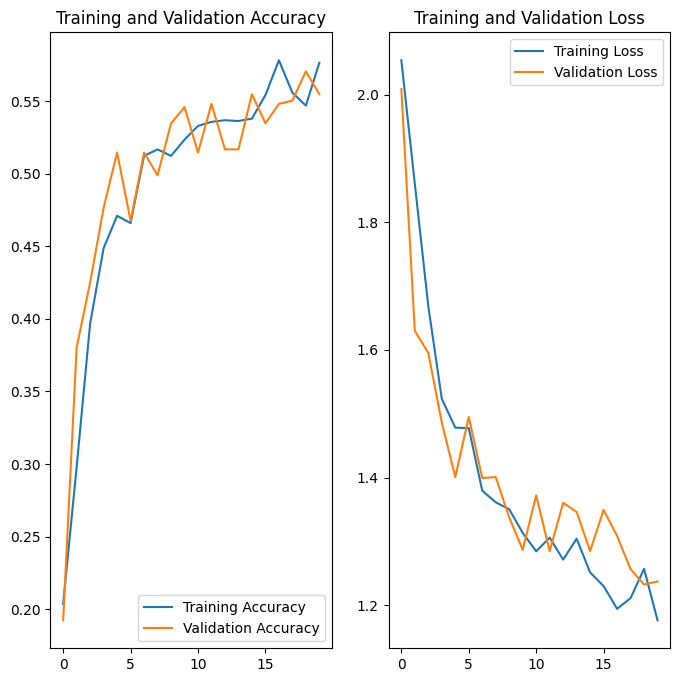

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Inference

As can be seen from the graphs, overfitting has now reduced as the gap between training accuracy and validation accuracy has reduced. But the overall training accuracy of the model has reduced to ~57% which means that the model is now underfitting. Hence, the data augmentation has helped in this case.

As the model is underfitting now, the next step would be is to understand the dataset and then take remedial actions. In the next steps, we will understand the distribution of the dataset and sample the data to address any imbalance in the distribution of the data. 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

actinic keratosis-114
basal cell carcinoma-376
dermatofibroma-95
melanoma-438
nevus-357
pigmented benign keratosis-462
seborrheic keratosis-77
squamous cell carcinoma-181
vascular lesion-139


<Figure size 1000x1000 with 0 Axes>

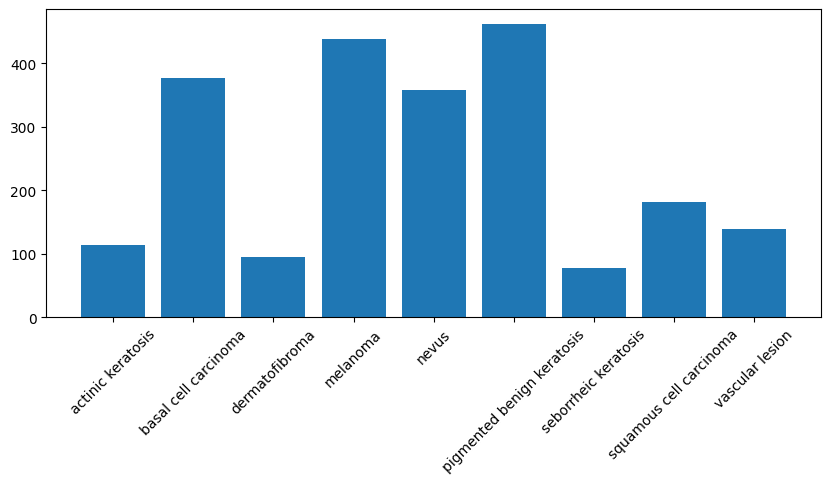

In [26]:
## Your code goes here.
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []
  image_count_train = len(list(data_dir_train.glob(i + '/*.jpg')))
  data[i] = image_count_train
  print(i + '-' + str(image_count_train))


plt.figure(figsize=(10, 10))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.xticks(rotation=45)
plt.show()


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?

Seborrheic keratosis has the least number of samples (77)

#### - Which classes dominate the data in terms proportionate number of samples?

The following classes have the most samples and dominate the sample set

1.   pigmented benign keratosis (462)
2.   melanoma (438)
3.   basal cell carcinoma (376)
4.   nevus (357)




#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [46]:
import Augmentor
import shutil

#path_to_training_dataset="/kaggle/input/cancerdataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
path_to_training_dataset = "/kaggle/input/cancerdataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory='/kaggle/working/data/'+i+'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /kaggle/working/data/actinic keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7942049C3970>: 100%|██████████| 500/500 [00:12<00:00, 38.83 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/data/basal cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79420C0E55A0>: 100%|██████████| 500/500 [00:14<00:00, 34.83 Samples/s] 


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/data/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79464046CDC0>: 100%|██████████| 500/500 [00:13<00:00, 36.62 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/data/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79420C282620>: 100%|██████████| 500/500 [01:11<00:00,  6.96 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/data/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7945BC67CC10>: 100%|██████████| 500/500 [01:02<00:00,  8.06 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/data/pigmented benign keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7945F132FB50>: 100%|██████████| 500/500 [00:12<00:00, 40.53 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/data/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79420493FD00>: 100%|██████████| 500/500 [00:31<00:00, 15.67 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/data/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79458E0EBAF0>: 100%|██████████| 500/500 [00:13<00:00, 38.26 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/data/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x794640576170>: 100%|██████████| 500/500 [00:12<00:00, 39.91 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

### Lets see the distribution of augmented data after adding new images to the original training data.

Generated Images: 4500
Class-wise Split - 
actinic keratosis-500
basal cell carcinoma-500
dermatofibroma-500
melanoma-500
nevus-500
pigmented benign keratosis-500
seborrheic keratosis-500
squamous cell carcinoma-500
vascular lesion-500


<Figure size 1000x1000 with 0 Axes>

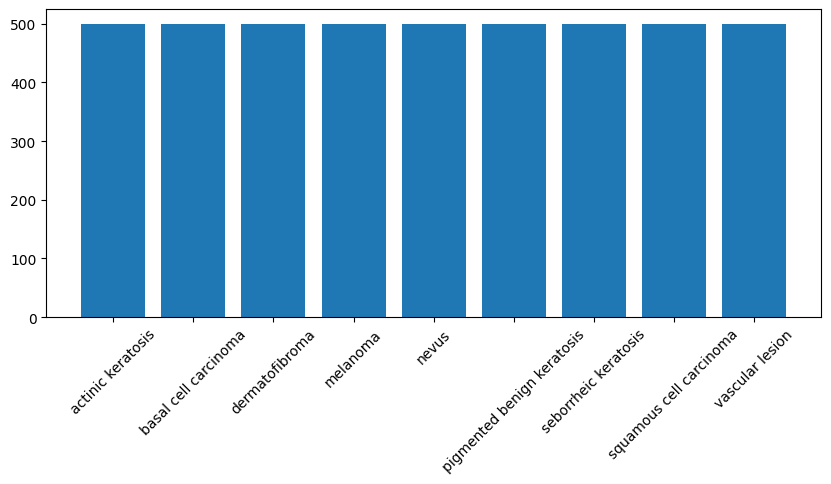

In [47]:
output_dir = pathlib.Path('/kaggle/working/data/')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print("Generated Images: " + str(image_count_train))

## Your code goes here.
import matplotlib.pyplot as plt
data = dict()

print ("Class-wise Split - ")
for i in class_names:
  data[i] = []
  #/output/
  image_count_train = len(list(output_dir.glob(i + '/output/*.jpg')))
  data[i] = image_count_train
  print(i + '-' + str(image_count_train))


plt.figure(figsize=(10, 10))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.xticks(rotation=45)
plt.show()


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [48]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo**: Create a model

In [49]:
def CNNModel_augmentation_final():
    model = Sequential()
    model.add(data_augmentation)
    model.add(layers.experimental.preprocessing.Rescaling(1.0 / 255.0,input_shape=(img_height, img_width, 3)))
    
    model.add(layers.Conv2D(32, 2, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, 2, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, 2, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(256, 2, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(512, 2, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu'))  
    model.add(Dense(num_classes, activation='softmax'))    
    return model


#### **Todo:** Create a training dataset

In [50]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(output_dir,
                                                               batch_size=batch_size,
                                                               image_size=(img_height,img_width),
                                                               label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(output_dir,batch_size=batch_size,
                                                            image_size=(img_height,img_width), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [52]:
model_final = CNNModel_augmentation_final()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'
model_final.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [53]:
epochs = 30
history = model_final.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 16s 124ms/step - loss: 3.1894 - accuracy: 0.2489 - val_loss: 2.3523 - val_accuracy: 0.1067
Epoch 2/30
113/113 [==============================] - 13s 111ms/step - loss: 1.5371 - accuracy: 0.3908 - val_loss: 2.5136 - val_accuracy: 0.1067
Epoch 3/30
113/113 [==============================] - 13s 109ms/step - loss: 1.4089 - accuracy: 0.4414 - val_loss: 2.2930 - val_accuracy: 0.1256
Epoch 4/30
113/113 [==============================] - 14s 117ms/step - loss: 1.3387 - accuracy: 0.4739 - val_loss: 1.6244 - val_accuracy: 0.3567
Epoch 5/30
113/113 [==============================] - 13s 110ms/step - loss: 1.2885 - accuracy: 0.5044 - val_loss: 1.3022 - val_accuracy: 0.4689
Epoch 6/30
113/113 [==============================] - 14s 116ms/step - loss: 1.2453 - accuracy: 0.5228 - val_loss: 1.3065 - val_accuracy: 0.4856
Epoch 7/30
113/113 [==============================] - 14s 113ms/step - loss: 1.1923 - accuracy: 0.5367 - val_loss: 1.1283 - val_ac

#### **Todo:**  Visualize the model results

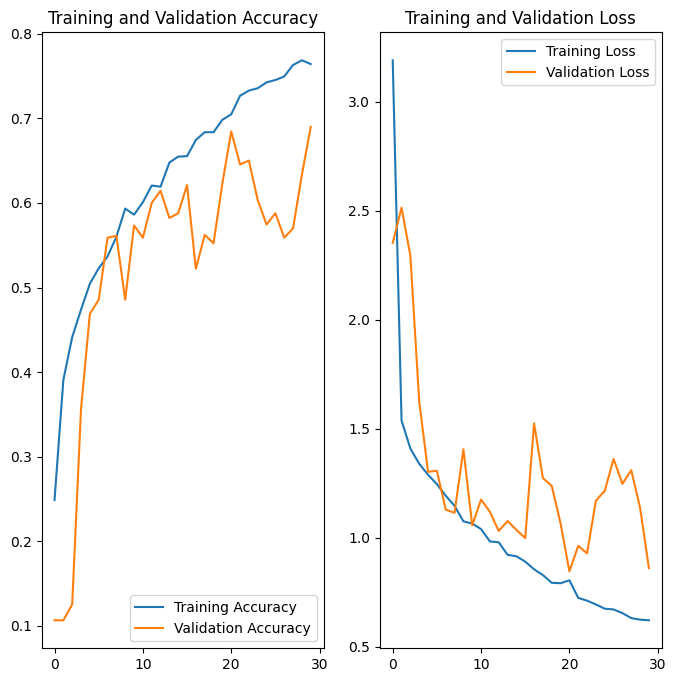

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

From the above charts, it is noticed that the gap between training and validation accuracy has reduced. The training accuracy has increased to ~76% and validation accuracy is about ~69%. Hence, no overfitting is happening. 

But looking at the charts, it can be seen that the training accuracy is increasing in a standard pace after the initial epochs but the validation accruacy is fluctuating. Similarly, training loss is reducing in a standard pace but validation loss is fluctuating.

Some fluctuations in validation accuracy during training are normal, especially in the early epochs. Understanding the long-term trend helps understand the performance of the model - whether validation accuracy generally increases and stabilizes or if it consistently degrades. 

If the fluctuations persist beyond the initial training phase as in this case, as next steps, the following improvements can be considered - 
1. Modifying the learning rate
2. Increasing the batch size
3. Collecting more representative data for validation
